# COMP41680 Assignment 2
# Student Number: 19204505

# Task 1 : Scraping data and storing in three seperate datasets

In [251]:
# Importing all the necessary libraries
import bs4
import urllib.request
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import *
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

In [252]:
mainlink = "http://mlg.ucd.ie/modules/yalp/" # storing the main link for future use

In [253]:
response = urllib.request.urlopen(mainlink) # get the content in response variable
print(response.code) # see if the request was processed succesfully

200


In [254]:
html = response.read().decode()
html_lines = html.strip().split("\n") # get the html page in readable format by stripping lines
for i in html_lines:
 print(i) # print the lines

<!DOCTYPE html>
<html lang="en">
<head>
    <meta name="robots" content="noindex">  
    <meta name="description" content="Content on this site is posted for teaching purposes only. Original data is from yelp.com">
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Yalp Home</title>
    <link rel="shortcut icon" href="images/favicon.ico">
    <!-- Bootstrap core CSS -->
    <link href="assets/css/bootstrap.css" rel="stylesheet">
    <!-- Custom styles for this template -->
    <link href="assets/css/style.css" rel="stylesheet">
    <link href="assets/css/font-awesome.min.css" rel="stylesheet">
    <script src="assets/js/modernizr.js"></script>
</head>
<body>
    <div class="container mtb">
        <div class="row">
        <div class="col-md-12">
          <h3 class="info"><a href="index.html" class="info">Yalp</a> &mdash; Home</h3>
        </div>
        </div>
       

In [255]:
parser = bs4.BeautifulSoup(html,"html.parser") 
categories = []
for match in parser.find_all('a'):    
    categories.append(match.get('href')) # get the categories in array categories
print(categories) # print the categories

['index.html', 'automotive_list.html', 'cafes_list.html', 'fashion_list.html', 'gym_list.html', 'hair_salons_list.html', 'hotels_list.html', 'restaurants_list.html']


In [256]:
categories = [mainlink+categories[3], mainlink+categories[4], mainlink+categories[7]] # append the chosen categories with main link
categories # display the chosen categories 

['http://mlg.ucd.ie/modules/yalp/fashion_list.html',
 'http://mlg.ucd.ie/modules/yalp/gym_list.html',
 'http://mlg.ucd.ie/modules/yalp/restaurants_list.html']

In [257]:
businesses = []
for i in categories:
    a=[]
    response = urllib.request.urlopen(i)
    html = response.read().decode()
    parser = bs4.BeautifulSoup(html,"html.parser")
    for l in parser.findAll('a'): # get the reviews by parsing each business in the category
        a.append(l.get('href'))
    businesses.append(a) #append the reviews to the array businesses
businesses

[['index.html',
  'review_set_eh_tMFEJMZzEM3swCqUNJA.html',
  'review_set_3ufeMJ2DTf1riU4Bi-gryg.html',
  'review_set_KjjQGzu0241FbeERM32dpQ.html',
  'review_set_t8Mo-KiivPqXbFKJmakj4w.html',
  'review_set_K6yaRzeAygK6Ha_YJnwIbg.html',
  'review_set_VYaXjNs2Nxp-TKJRH1L25A.html',
  'review_set_E8t19sCra4kctooZMitsZw.html',
  'review_set_drjYqhKXgOfW9OYCwQEQfQ.html',
  'review_set_6q3D1RTChNltJviipr1CPA.html',
  'review_set_zfxjGCMSY6CRTrcVtpmJYA.html',
  'review_set_CGv-5oD6zM64pfbcOnVY1w.html',
  'review_set_sLQUMUETOruStVknkxxEtQ.html',
  'review_set_nxXIBbN1yqSQLSD6Dv-D_w.html',
  'review_set_JFpD5UJjopEm4BvFtmNLjw.html',
  'review_set_vEwnnC_Qwuk0KbcnkoTbyw.html',
  'review_set_RHyihD5lZIXXXwxFpPphmw.html',
  'review_set_XAw6mpKbTAgjMdxCFQ4UxA.html',
  'review_set_0Z5501L4Jh2KBIvMHzFgtg.html',
  'review_set_DmFO4PabO2CoCOStOBqkAg.html',
  'review_set_319J-Mc0VAoPw8UrbtARVQ.html',
  'review_set_FVjnVMn1zuo_yRa9Xxl4Xw.html',
  'review_set_bmBlZrRCSF9EQ1GZbn44uA.html',
  'review_set_Bm

In [258]:
businesses =  [ [mainlink+c for c in a] for a in businesses] # append the reviews obtained with the main link
businesses # display the links of the individual reviews for all categories in a list

[['http://mlg.ucd.ie/modules/yalp/index.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_eh_tMFEJMZzEM3swCqUNJA.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_3ufeMJ2DTf1riU4Bi-gryg.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_KjjQGzu0241FbeERM32dpQ.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_t8Mo-KiivPqXbFKJmakj4w.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_K6yaRzeAygK6Ha_YJnwIbg.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_VYaXjNs2Nxp-TKJRH1L25A.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_E8t19sCra4kctooZMitsZw.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_drjYqhKXgOfW9OYCwQEQfQ.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_6q3D1RTChNltJviipr1CPA.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_zfxjGCMSY6CRTrcVtpmJYA.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_CGv-5oD6zM64pfbcOnVY1w.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_sLQUMUETOruStVknkxxEtQ.html',
  'http://mlg.ucd.ie/modules/yalp/review_set_nxXIBbN1

In [259]:
df= []
i=0
for data in businesses:
    rev=[] 
    rat=[] 
    for d in data:
        response = urllib.request.urlopen(d)
        html = response.read().decode()
        parser = bs4.BeautifulSoup(html,"html.parser")
        for link in parser.findAll('p',class_='review-text'): # get the reviews 
            rev.append(link.get_text()) # append the text of the review to rev variable
        for ratings in parser.findAll('img'): # for ratings
            if ratings.get('alt')!=None: 
                if int(ratings.get('alt')[0])>3: # if >3, append rating = 'Positive'
                    rat.append('Positive')
                else:
                    rat.append('Negative') # if rating = 1, 2, 3 append rating = 'Negative'
    df.append(pd.DataFrame(rev)) # put the reviews in a dataframe
    df[i]['Ratings']=rat # put the ratings in a dataframe   
    i=i+1
df[0].columns=['Review','Ratings'] # for first category
df[1].columns=['Review','Ratings'] # for second category
df[2].columns=['Review','Ratings'] # for third category
df # display the list of dataframes

[                                                 Review   Ratings
 0     Looking for the best tactical supplies? Look n...  Positive
 1     Stood in line like an idiot for 5 minutes to p...  Negative
 2     Another great store with quality Equipment. Th...  Positive
 3     The Problem with this store is not that they h...  Positive
 4     Great place! We went in at almost closing time...  Positive
 ...                                                 ...       ...
 1995  God, I'd never thought I'd see the day when I'...  Positive
 1996  They keep shooting themselves in the foot. Apo...  Negative
 1997  Extremely dark., so dark you can't see the out...  Negative
 1998  This place is dark, loud, and filled with enou...  Negative
 1999  If you ever wanted proof that sex sells just l...  Negative
 
 [2000 rows x 2 columns],
                                                  Review   Ratings
 0     If you're looking for boxing in the East Valle...  Positive
 1     I was really excited to try

In [260]:
df[0].to_csv('fashion.csv',index=False) # convert the dataframes to csv datasets
df[1].to_csv('gym.csv',index=False)
df[2].to_csv('restaurants.csv',index=False)

# Task 2: Pre-processing, Classification and Evaluation

In [261]:
df1 = pd.read_csv('fashion.csv') # read the datasets in df1, df2 and df3 variables
df2 = pd.read_csv('gym.csv')
df3 = pd.read_csv('restaurants.csv')

## For dataset 1: fashion

In [262]:
reviews = df1["Review"] 
ratings = df1["Ratings"]

In [263]:
vectorizer = CountVectorizer( ngram_range = (1,2),  stop_words='english' ) # pre-process to get data into proper numeric representation
X = vectorizer.fit_transform(reviews)
terms = vectorizer.get_feature_names()
print(X.shape)

(2000, 90094)


In [264]:
data_train, data_test, target_train, target_test = train_test_split(X, ratings, test_size=0.3) # train on 70% data test on 30% data
model = MultinomialNB() # use Naive Bayes to evaluate
model.fit(data_train, target_train)
predicted = model.predict(data_test)
predicted # predicted labels

array(['Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negati

In [265]:
print(classification_report(target_test, predicted, target_names=["Positive","Negative"])) # get a classification report of evaluation metrics

              precision    recall  f1-score   support

    Positive       0.86      0.84      0.85       234
    Negative       0.90      0.92      0.91       366

    accuracy                           0.89       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.89      0.89      0.89       600



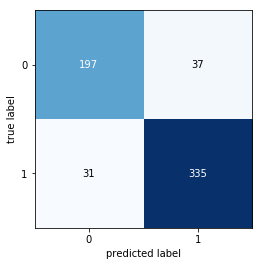

In [266]:
cm = confusion_matrix(target_test, predicted) # print a confusion matrix
fig, ax = plot_confusion_matrix(cm)
plt.show()

For the fashion dataset, the accuracy is 89%. But since we know that accuracy is not always a reliable factor, let us also take into consideration the confusion matrix. Here, what matters to us is how many are correctly classified i.e. positive are actually classified as positive reviews and negative are actually classified as negative reviews. Precision for positive labels is 86% while that for negative labels is 90% which is a good precision.

## For dataset 2: gym

In [267]:
reviews = df2["Review"]
ratings = df2["Ratings"]

In [268]:
vectorizer = CountVectorizer( ngram_range = (1,2),  stop_words='english' ) # pre-process to get data into proper numeric representation
X = vectorizer.fit_transform(reviews)
terms = vectorizer.get_feature_names()
print(X.shape)

(2000, 98434)


In [269]:
data_train, data_test, target_train, target_test = train_test_split(X, ratings, test_size=0.3)
model = MultinomialNB()
model.fit(data_train, target_train)
predicted = model.predict(data_test)
predicted

array(['Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negati

In [270]:
print(classification_report(target_test, predicted, target_names=["Positive","Negative"]))

              precision    recall  f1-score   support

    Positive       0.89      0.84      0.86       195
    Negative       0.92      0.95      0.94       405

    accuracy                           0.91       600
   macro avg       0.90      0.89      0.90       600
weighted avg       0.91      0.91      0.91       600



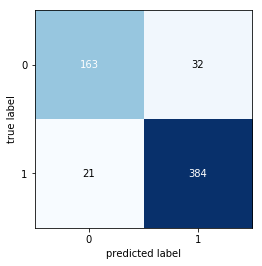

In [271]:
cm = confusion_matrix(target_test, predicted) # print a confusion matrix
fig, ax = plot_confusion_matrix(cm)
plt.show()

For the gym dataset, the accuracy is 91%. Let us also take into consideration the confusion matrix. Here, again what matters to us is how many are correctly classified i.e. positive are actually classified as positive reviews and negative are actually classified as negative reviews. Precision for positive labels is 89% while that for negative labels is 92% which is a better precision than previous fashion dataset.

## For dataset 3: restaurants

In [272]:
reviews = df3["Review"]
ratings = df3["Ratings"]

In [273]:
vectorizer = CountVectorizer( ngram_range = (1,2),  stop_words='english' )
X = vectorizer.fit_transform(reviews)
terms = vectorizer.get_feature_names()
print(X.shape)

(2000, 92857)


In [274]:
data_train, data_test, target_train, target_test = train_test_split(X, ratings, test_size=0.3)
model = MultinomialNB()
model.fit(data_train, target_train)
predicted = model.predict(data_test)
predicted

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negati

In [275]:
print(classification_report(target_test, predicted, target_names=["Positive","Negative"]))

              precision    recall  f1-score   support

    Positive       0.85      0.78      0.81       226
    Negative       0.87      0.92      0.90       374

    accuracy                           0.87       600
   macro avg       0.86      0.85      0.86       600
weighted avg       0.87      0.87      0.87       600



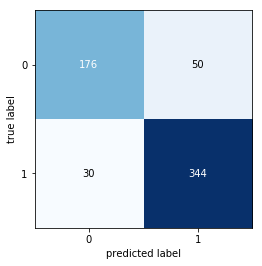

In [276]:
cm = confusion_matrix(target_test, predicted) # print a confusion matrix
fig, ax = plot_confusion_matrix(cm)
plt.show()

For the restaurants dataset, the accuracy is 87%. Let us also take into consideration the confusion matrix. Here, again what matters to us is how many are correctly classified i.e. positive are actually classified as positive reviews and negative are actually classified as negative reviews. Precision for positive labels is 85% while that for negative labels is 87%.

So, overall in terms of accuracy the order of performance for the datasets is as follows:

gym (91%) > fashion (89%) > restaurants (87%)

And if we see in terms of precision of positive and negative labels, the same is inferred:

Positive: gym (89%) > fashion (86%) > restaurants (85%)

Negative: gym (92%) > fashion (90%) > restaurants (87%)

# Task 3: Training on one category and evaluating on the other two 

## (a.) Training on fashion dataset, evaluation on gym and restaurants datasets

In [277]:
vectorizer = CountVectorizer( ngram_range = (1,2),  stop_words='english' ) # prepare fashion dataset
X_fashion = vectorizer.fit_transform(df1['Review'].values)
y_fashion = df1['Ratings'].values
X_fashion.shape

(2000, 90094)

In [278]:
X_gym = vectorizer.transform(df2['Review'].values) # prepare gym dataset
y_gym = df2['Ratings'].values
X_gym.shape

(2000, 90094)

In [279]:
X_restaurant = vectorizer.transform(df3['Review'].values) # prepare restaurant dataset
y_restaurant = df3['Ratings'].values
X_restaurant.shape

(2000, 90094)

### Train on fashion dataset

In [280]:
model_fashion = MultinomialNB() # train on fashion dataset with Naive Bayes
model_fashion.fit(X_fashion, y_fashion)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Test on gym dataset

In [281]:
y_pred = model_fashion.predict(X_gym) # test on gym dataset 
print(classification_report(y_gym, y_pred, target_names=["Positive","Negative"]))

              precision    recall  f1-score   support

    Positive       0.95      0.70      0.81       701
    Negative       0.86      0.98      0.92      1299

    accuracy                           0.88      2000
   macro avg       0.91      0.84      0.86      2000
weighted avg       0.89      0.88      0.88      2000



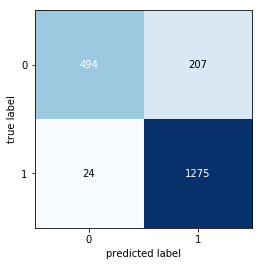

In [282]:
cm = confusion_matrix(y_gym, y_pred)
fig, ax = plot_confusion_matrix(cm)
plt.show()

### Test on restaurants dataset

In [283]:
y_pred = model_fashion.predict(X_restaurant) # test on restaurants dataset
print(classification_report(y_restaurant, y_pred, target_names=["Positive","Negative"]))

              precision    recall  f1-score   support

    Positive       0.91      0.59      0.72       838
    Negative       0.76      0.96      0.85      1162

    accuracy                           0.80      2000
   macro avg       0.84      0.77      0.78      2000
weighted avg       0.83      0.80      0.79      2000



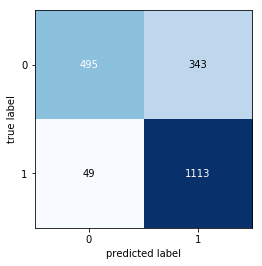

In [284]:
cm = confusion_matrix(y_restaurant, y_pred)
fig, ax = plot_confusion_matrix(cm)
plt.show()

Now, when we train on the fashion dataset with Naive Bayes and test the model on gym and restaurants dataset, their accuracies seem to drop than their original ones. For instance, the accuracy of gym dataset drops from 91% to 88% and that of the restaurant dataset drops from 87% to 80%. This is bound to happen because we are training the dataset on a different dataset testing the model on a whole different dataset. Hence, the accuracy drops.

## (b.) Training on gym dataset, evaluation on fashion and restaurants dataset

### Train on gym dataset

In [285]:
model_gym = MultinomialNB()
model_gym.fit(X_gym, y_gym)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Test on fashion dataset

In [286]:
y_pred = model_gym.predict(X_fashion)
print(classification_report(y_fashion, y_pred, target_names=["Positive","Negative"]))

              precision    recall  f1-score   support

    Positive       0.80      0.88      0.84       795
    Negative       0.91      0.86      0.88      1205

    accuracy                           0.86      2000
   macro avg       0.86      0.87      0.86      2000
weighted avg       0.87      0.86      0.87      2000



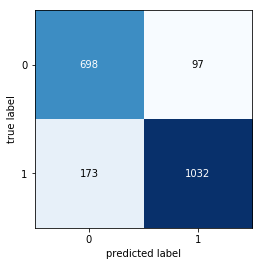

In [287]:
cm = confusion_matrix(y_fashion, y_pred)
fig, ax = plot_confusion_matrix(cm)
plt.show()

### Test on restaurants dataset

In [288]:
y_pred = model_gym.predict(X_restaurant)
print(classification_report(y_restaurant, y_pred, target_names=["Positive","Negative"]))

              precision    recall  f1-score   support

    Positive       0.91      0.56      0.69       838
    Negative       0.75      0.96      0.84      1162

    accuracy                           0.79      2000
   macro avg       0.83      0.76      0.77      2000
weighted avg       0.82      0.79      0.78      2000



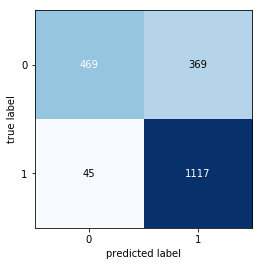

In [289]:
cm = confusion_matrix(y_restaurant, y_pred)
fig, ax = plot_confusion_matrix(cm)
plt.show()

Now, when we train on the gym dataset with Naive Bayes and test the model on fashion and restaurants dataset, their accuracies seem to drop than their original ones here too. For instance, the accuracy of fashion dataset drops from 89% to 86% and that of the restaurant dataset drops from 87% to 79%. This is bound to happen because we are training the dataset on a different dataset testing the model on a whole different dataset. Hence, the accuracy drops.

## (c.) Training on restaurants dataset, evaluation on fashion and gym dataset

### Train on restaurant dataset

In [290]:
model_restaurant = MultinomialNB()
model_restaurant.fit(X_restaurant, y_restaurant)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Test on fashion dataset

In [291]:
y_pred = model_restaurant.predict(X_fashion)
print(classification_report(y_fashion, y_pred, target_names=["Positive","Negative"]))

              precision    recall  f1-score   support

    Positive       0.70      0.91      0.79       795
    Negative       0.93      0.75      0.83      1205

    accuracy                           0.81      2000
   macro avg       0.81      0.83      0.81      2000
weighted avg       0.84      0.81      0.81      2000



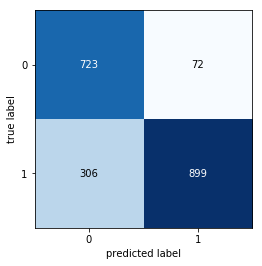

In [292]:
cm = confusion_matrix(y_fashion, y_pred)
fig, ax = plot_confusion_matrix(cm)
plt.show()

### Test on gym dataset

In [293]:
y_pred = model_restaurant.predict(X_gym)
print(classification_report(y_gym, y_pred, target_names=["Positive","Negative"]))

              precision    recall  f1-score   support

    Positive       0.78      0.87      0.82       701
    Negative       0.92      0.87      0.89      1299

    accuracy                           0.87      2000
   macro avg       0.85      0.87      0.86      2000
weighted avg       0.87      0.87      0.87      2000



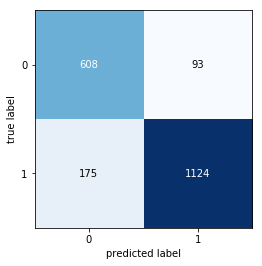

In [294]:
cm = confusion_matrix(y_gym, y_pred)
fig, ax = plot_confusion_matrix(cm)
plt.show()

Now, when we train on the restaurant dataset with Naive Bayes and test the model on fashion and gym dataset, their accuracies seem to drop than their original ones here as expected and observed. For instance, the accuracy of fashion dataset drops from 89% to 81% and that of the gym dataset drops from 91% to 87%. This is bound to happen because we are training the dataset on a different dataset testing the model on a whole different dataset. Hence, the accuracy drops.

# Reflection

So, overall to summarise, the performance of datasets based on their order of decreasing accuracies are gym , fashion and restaurants. Their accuracies are high because of the training and testing data that each of the dataset is split into.

Also, when a model is trained on one dataset and then tested on a completely different dataset, we observe that it's accuracy is bound to drop as we are not splitting the data for training and testing.